In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

In [2]:
train_dir = r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\fer2013\train'
val_dir = r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\fer2013\validation'
img_rows = 48
img_cols = 48
batch_size = 32

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale = 1/ 255.,
                                   rotation_range = 30,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
                                  )

val_datagen = ImageDataGenerator(rescale = 1/ 255.)


In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    color_mode = 'grayscale',
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    shuffle = True
                                                   )

val_generator = val_datagen.flow_from_directory(val_dir,
                                                color_mode = 'grayscale',
                                                target_size = (img_rows, img_cols),
                                                batch_size = batch_size,
                                                class_mode = 'categorical',
                                                shuffle = True
                                               )

Found 31761 images belonging to 7 classes.
Found 3974 images belonging to 7 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

In [18]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation = 'elu', padding = 'same', input_shape = (img_rows, img_cols, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation = 'elu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation = 'elu', padding = 'same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation = 'elu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(128, (3, 3), activation = 'elu', padding = 'same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation = 'elu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(256, (3, 3), activation = 'elu', padding = 'same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation = 'elu', padding = 'same'),
    BatchNormalization(),
    Dropout(0.3),
    
    Flatten(),
    Dense(512, activation = 'elu'),
    Dropout(0.4),
    Dense(512, activation = 'elu'),
    Dense(7, activation = 'softmax')
    
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)       

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [20]:
checkpoint = ModelCheckpoint('Checkpoints/emotion_detector.h5',
                             verbose = 1,
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only = True
                            )

earlystop = EarlyStopping(monitor = 'val_loss',
                          verbose = 1,
                          patience = 4,
                          restore_best_weights = True
                         )

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              verbose = 1,
                              min_delta = 0.00001,
                              patience = 2,
                              factor = 0.3
                             )

callbacks = [checkpoint, earlystop, reduce_lr]

In [21]:
model.compile(optimizer = Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
max_epochs = 50

history = model.fit(train_generator, epochs = max_epochs, validation_data = (val_generator), callbacks = callbacks)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 993 steps, validate for 125 steps
Epoch 1/50
992/993 [============================>.] - ETA: 1s - loss: 2.0625 - accuracy: 0.1955
Epoch 00001: val_loss improved from inf to 1.96635, saving model to Checkpoints/emotion_detector.h5
993/993 [==============================] - 1495s 2s/step - loss: 2.0625 - accuracy: 0.1954 - val_loss: 1.9664 - val_accuracy: 0.1241
Epoch 2/50
992/993 [============================>.] - ETA: 1s - loss: 1.9432 - accuracy: 0.2028
Epoch 00002: val_loss did not improve from 1.96635
993/993 [==============================] - 1263s 1s/step - loss: 1.9433 - accuracy: 0.2028 - val_loss: 2.0927 - val_accuracy: 0.2235
Epoch 3/50
992/993 [============================>.] - ETA: 1s - loss: 1.9215 - accuracy: 0.2117
Epoch 00003: val_loss improved from 1.96635 to 1.91797, saving model to Checkpoints/emotion_detector.h5
993/993 [==============================] - 1091s 1s/step - loss: 1.9213 - accuracy: 0.2119 - val_

In [24]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

Found 3974 images belonging to 7 classes.
Confusion Matrix
[[218  31  63  12  95  67   5]
 [ 64 344  16  16   0   0   0]
 [ 82  16 142  17 112 114  45]
 [ 14   5  22 750  66  12  10]
 [ 76  25  55 151 174  95  50]
 [ 41  14  30  28 195 279   7]
 [  9   9  87  28  21   1 261]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.43      0.44      0.44       491
     Disgust       0.77      0.78      0.78       440
        Fear       0.34      0.27      0.30       528
       Happy       0.75      0.85      0.80       879
     Neutral       0.26      0.28      0.27       626
         Sad       0.49      0.47      0.48       594
    Surprise       0.69      0.63      0.66       416

    accuracy                           0.55      3974
   macro avg       0.53      0.53      0.53      3974
weighted avg       0.54      0.55      0.54      3974



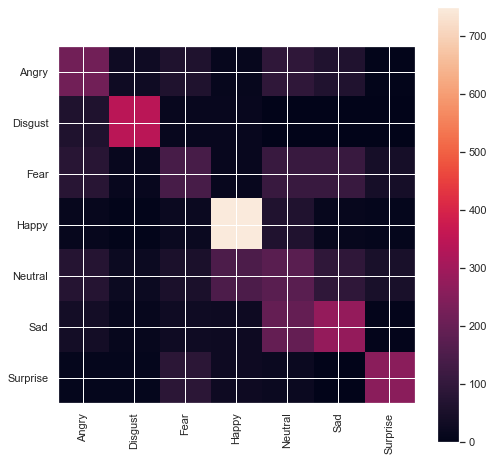

In [36]:
nb_train_samples = 31761
nb_val_samples = 3974

validation_generator = val_datagen.flow_from_directory(val_dir,
                                                       color_mode = 'grayscale',
                                                       target_size = (img_rows, img_cols),
                                                       batch_size = batch_size,
                                                       class_mode = 'categorical',
                                                       shuffle = False
                                                      )

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#classification report & confusion matrix

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis = 1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names = target_names))

plt.figure(figsize = (8, 8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation = 'nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation = 90)
_ = plt.yticks(tick_marks, classes)

In [5]:
from tensorflow.keras.models import load_model

classifier = load_model('Checkpoints/emotion_detector.h5')

In [6]:
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 3974 images belonging to 7 classes.
{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}


In [11]:
import cv2
import numpy as np
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier(r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\18 . Deep Survaliance - Build a Face Detector with Emotion, Age and Gender Recognition\Haarcascades\haarcascade_frontalface_default.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      